In [1]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# -----------------------------
# 1. Data Preprocessing (Batting Subclasses)
# -----------------------------
base_dir = "/kaggle/input/ju-cricket/Cricket_Dataset_final/Task_B"

transform = transforms.Compose([
    transforms.Resize((224, 224)),   
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], 
                         [0.229, 0.224, 0.225])
])

# Point directly inside Batting folder
train_ds = datasets.ImageFolder(f"{base_dir}/train/Bowling", transform=transform)
val_ds   = datasets.ImageFolder(f"{base_dir}/val/Bowling", transform=transform)
test_ds  = datasets.ImageFolder(f"{base_dir}/test/Bowling", transform=transform)

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
val_loader   = DataLoader(val_ds, batch_size=32, shuffle=False)
test_loader  = DataLoader(test_ds, batch_size=32, shuffle=False)

classes = train_ds.classes
print("Batting Subclasses:", classes)
print("Train samples:", len(train_ds), "Val samples:", len(val_ds), "Test samples:", len(test_ds))


Batting Subclasses: ['fast_bowl', 'spin_bowl']
Train samples: 1710 Val samples: 432 Test samples: 549


In [2]:
print("Total training images:", len(train_ds))
print("Total validation images:", len(val_ds))
print("Total test images:", len(test_ds))

total_images = len(train_ds) + len(val_ds) + len(test_ds)
print("Total images in dataset:", total_images)

Total training images: 1710
Total validation images: 432
Total test images: 549
Total images in dataset: 2691


In [3]:
ignore_folder = "random_occlusion"

def count_images_ignore_folder(dataset, ignore_folder):
    count = 0
    for img_path, label in dataset.samples:
        # Skip if the image path contains the ignore_folder
        if ignore_folder not in img_path.split("/"):
            count += 1
    return count

train_count = count_images_ignore_folder(train_ds, ignore_folder)
val_count   = count_images_ignore_folder(val_ds, ignore_folder)
test_count  = count_images_ignore_folder(test_ds, ignore_folder)

total_count = train_count + val_count + test_count

print("Training images (excluding '{}'): {}".format(ignore_folder, train_count))
print("Validation images (excluding '{}'): {}".format(ignore_folder, val_count))
print("Test images (excluding '{}'): {}".format(ignore_folder, test_count))
print("Total images (excluding '{}'): {}".format(ignore_folder, total_count))

Training images (excluding 'random_occlusion'): 1520
Validation images (excluding 'random_occlusion'): 384
Test images (excluding 'random_occlusion'): 488
Total images (excluding 'random_occlusion'): 2392


In [4]:
ignore_folder = "random_occlusionw"

def get_included_folders(dataset, ignore_folder):
    included = set()
    for img_path, label in dataset.samples:
        # Split the path into parts and ignore if ignore_folder is in the path
        if ignore_folder not in img_path.split("/"):
            # The folder name just above the image (or the class folder)
            folder_name = img_path.split("/")[-2]
            included.add(folder_name)
    return included

train_folders = get_included_folders(train_ds, ignore_folder)
val_folders   = get_included_folders(val_ds, ignore_folder)
test_folders  = get_included_folders(test_ds, ignore_folder)

print("Training folders considered:", train_folders)
print("Validation folders considered:", val_folders)
print("Test folders considered:", test_folders)

Training folders considered: {'original', 'gaussian_noise', 'blur', 'low_resolution', 'dirty_lens', 'chromatic_aberration', 'motion_blur', 'random_occlusion', 'lens_flare'}
Validation folders considered: {'original', 'gaussian_noise', 'blur', 'low_resolution', 'dirty_lens', 'chromatic_aberration', 'motion_blur', 'random_occlusion', 'lens_flare'}
Test folders considered: {'original', 'gaussian_noise', 'blur', 'low_resolution', 'dirty_lens', 'chromatic_aberration', 'motion_blur', 'random_occlusion', 'lens_flare'}


In [5]:
ignore_folder = "random_occlusion"

def filter_samples(dataset, ignore_folder):
    # Keep only samples where ignore_folder is NOT in the path
    filtered_samples = [s for s in dataset.samples if ignore_folder not in s[0].split("/")]
    dataset.samples = filtered_samples
    dataset.targets = [s[1] for s in filtered_samples]  # Update targets accordingly
    return dataset

# Create original datasets
train_ds = datasets.ImageFolder(f"{base_dir}/train/Bowling", transform=transform)
val_ds   = datasets.ImageFolder(f"{base_dir}/val/Bowling", transform=transform)
test_ds  = datasets.ImageFolder(f"{base_dir}/test/Bowling", transform=transform)

# Filter out 'random_occlusion' folder
train_ds = filter_samples(train_ds, ignore_folder)
val_ds   = filter_samples(val_ds, ignore_folder)
test_ds  = filter_samples(test_ds, ignore_folder)

# DataLoaders
train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
val_loader   = DataLoader(val_ds, batch_size=32, shuffle=False)
test_loader  = DataLoader(test_ds, batch_size=32, shuffle=False)

# Classes (will remain the same)
classes = train_ds.classes
print("Classes:", classes)

# Show counts
print("Final Training images:", len(train_ds))
print("Final Validation images:", len(val_ds))
print("Final Test images:", len(test_ds))
print("Total images after filtering:", len(train_ds) + len(val_ds) + len(test_ds))

Classes: ['fast_bowl', 'spin_bowl']
Final Training images: 1520
Final Validation images: 384
Final Test images: 488
Total images after filtering: 2392


In [6]:
ignore_folder = "random_occlusion"

def get_included_folders(dataset, ignore_folder):
    included = set()
    for img_path, label in dataset.samples:
        # Split the path into parts and ignore if ignore_folder is in the path
        if ignore_folder not in img_path.split("/"):
            # The folder name just above the image (or the class folder)
            folder_name = img_path.split("/")[-2]
            included.add(folder_name)
    return included

train_folders = get_included_folders(train_ds, ignore_folder)
val_folders   = get_included_folders(val_ds, ignore_folder)
test_folders  = get_included_folders(test_ds, ignore_folder)

print("Training folders considered:", train_folders)
print("Validation folders considered:", val_folders)
print("Test folders considered:", test_folders)

Training folders considered: {'original', 'gaussian_noise', 'blur', 'low_resolution', 'dirty_lens', 'chromatic_aberration', 'motion_blur', 'lens_flare'}
Validation folders considered: {'original', 'gaussian_noise', 'blur', 'low_resolution', 'dirty_lens', 'chromatic_aberration', 'motion_blur', 'lens_flare'}
Test folders considered: {'original', 'gaussian_noise', 'blur', 'low_resolution', 'dirty_lens', 'chromatic_aberration', 'motion_blur', 'lens_flare'}


In [7]:
import seaborn as sns
import numpy as np
import time
from tqdm import tqdm

In [8]:
# -----------------------------
# 2. Define ResNet50 Model from Scratch
# -----------------------------
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from torchsummary import summary
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
from tqdm import tqdm
import time

class Bottleneck(nn.Module):
    """Bottleneck block for ResNet50"""
    expansion = 4
    
    def __init__(self, inplanes, planes, stride=1, downsample=None):
        super().__init__()
        self.conv1 = nn.Conv2d(inplanes, planes, kernel_size=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)
        self.conv3 = nn.Conv2d(planes, planes * self.expansion, kernel_size=1, bias=False)
        self.bn3 = nn.BatchNorm2d(planes * self.expansion)
        self.relu = nn.ReLU(inplace=True)
        self.downsample = downsample
        self.stride = stride
    
    def forward(self, x):
        identity = x
        
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        
        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu(out)
        
        out = self.conv3(out)
        out = self.bn3(out)
        
        if self.downsample is not None:
            identity = self.downsample(x)
        
        out += identity
        out = self.relu(out)
        
        return out

class MyResNet50(nn.Module):
    """ResNet50 Implementation from Scratch"""
    def __init__(self, num_classes=4, zero_init_residual=False):
        super().__init__()
        self.inplanes = 64
        
        # Initial convolution and pooling layers
        self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        
        # Residual layers
        self.layer1 = self._make_layer(64, 3)
        self.layer2 = self._make_layer(128, 4, stride=2)
        self.layer3 = self._make_layer(256, 6, stride=2)
        self.layer4 = self._make_layer(512, 3, stride=2)
        
        # Final layers
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512 * Bottleneck.expansion, num_classes)
        
        # Initialize weights
        self._initialize_weights(zero_init_residual)
    
    def _make_layer(self, planes, blocks, stride=1):
        """Create a residual layer with specified number of blocks"""
        downsample = None
        if stride != 1 or self.inplanes != planes * Bottleneck.expansion:
            downsample = nn.Sequential(
                nn.Conv2d(self.inplanes, planes * Bottleneck.expansion,
                          kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(planes * Bottleneck.expansion),
            )
        
        layers = []
        layers.append(Bottleneck(self.inplanes, planes, stride, downsample))
        self.inplanes = planes * Bottleneck.expansion
        for _ in range(1, blocks):
            layers.append(Bottleneck(self.inplanes, planes))
        
        return nn.Sequential(*layers)
    
    def _initialize_weights(self, zero_init_residual):
        """Initialize weights using He initialization"""
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, (nn.BatchNorm2d, nn.GroupNorm)):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0, 0.01)
                nn.init.constant_(m.bias, 0)
        
        # Zero-initialize the last BN in each residual branch for better training
        if zero_init_residual:
            for m in self.modules():
                if isinstance(m, Bottleneck):
                    nn.init.constant_(m.bn3.weight, 0)
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        
        return x

In [9]:
# -----------------------------
# 3. Training Setup
# -----------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MyResNet50(num_classes=len(classes), zero_init_residual=True).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9, weight_decay=1e-4)

print("ResNet50 Model Summary:")
try:
    summary(model, (3, 224, 224))
except:
    print("Model summary generation failed - this is normal for complex architectures")
    print(f"Model created successfully with {sum(p.numel() for p in model.parameters()):,} parameters")

ResNet50 Model Summary:
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm


🚀 Starting ResNet50 Training for 50 epochs...

📈 Epoch 1/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:35<00:00,  1.35it/s, Loss=2.0420, Acc=0.5434]


✅ Training completed in 35.46s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:05<00:00,  2.13it/s, Loss=4.1449, Acc=0.6172]


✅ Validation completed in 5.65s
🌟 New best ResNet50 model found! Validation Accuracy: 0.6172

📊 Epoch 1 Summary:
│ Train Loss: 2.0420 | Train Acc: 0.5434
│ Val Loss:   4.1449 | Val Acc:   0.6172
│ Train Time: 35.46s | Val Time: 5.65s
│ Total Epoch Time: 41.11s
│ Best Val Acc: 0.6172 (Epoch 1)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 2/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:25<00:00,  1.86it/s, Loss=1.6540, Acc=0.5645]


✅ Training completed in 25.75s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:03<00:00,  3.73it/s, Loss=1.0241, Acc=0.6068]


✅ Validation completed in 3.22s

📊 Epoch 2 Summary:
│ Train Loss: 1.6540 | Train Acc: 0.5645
│ Val Loss:   1.0241 | Val Acc:   0.6068
│ Train Time: 25.75s | Val Time: 3.22s
│ Total Epoch Time: 28.98s
│ Best Val Acc: 0.6172 (Epoch 1)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 3/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:25<00:00,  1.85it/s, Loss=0.9771, Acc=0.6066]


✅ Training completed in 26.00s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:03<00:00,  3.75it/s, Loss=0.7970, Acc=0.6302]


✅ Validation completed in 3.21s
🌟 New best ResNet50 model found! Validation Accuracy: 0.6302

📊 Epoch 3 Summary:
│ Train Loss: 0.9771 | Train Acc: 0.6066
│ Val Loss:   0.7970 | Val Acc:   0.6302
│ Train Time: 26.00s | Val Time: 3.21s
│ Total Epoch Time: 29.21s
│ Best Val Acc: 0.6302 (Epoch 3)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 4/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:26<00:00,  1.82it/s, Loss=0.7577, Acc=0.5980]


✅ Training completed in 26.44s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:03<00:00,  3.73it/s, Loss=0.6692, Acc=0.6250]


✅ Validation completed in 3.22s

📊 Epoch 4 Summary:
│ Train Loss: 0.7577 | Train Acc: 0.5980
│ Val Loss:   0.6692 | Val Acc:   0.6250
│ Train Time: 26.44s | Val Time: 3.22s
│ Total Epoch Time: 29.66s
│ Best Val Acc: 0.6302 (Epoch 3)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 5/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:26<00:00,  1.78it/s, Loss=0.6711, Acc=0.6211]


✅ Training completed in 26.99s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:03<00:00,  3.75it/s, Loss=0.6951, Acc=0.5964]


✅ Validation completed in 3.20s

📊 Epoch 5 Summary:
│ Train Loss: 0.6711 | Train Acc: 0.6211
│ Val Loss:   0.6951 | Val Acc:   0.5964
│ Train Time: 26.99s | Val Time: 3.20s
│ Total Epoch Time: 30.20s
│ Best Val Acc: 0.6302 (Epoch 3)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 6/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:28<00:00,  1.71it/s, Loss=0.6640, Acc=0.6178]


✅ Training completed in 28.07s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:03<00:00,  3.58it/s, Loss=0.7025, Acc=0.6380]


✅ Validation completed in 3.35s
🌟 New best ResNet50 model found! Validation Accuracy: 0.6380

📊 Epoch 6 Summary:
│ Train Loss: 0.6640 | Train Acc: 0.6178
│ Val Loss:   0.7025 | Val Acc:   0.6380
│ Train Time: 28.07s | Val Time: 3.35s
│ Total Epoch Time: 31.43s
│ Best Val Acc: 0.6380 (Epoch 6)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 7/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:27<00:00,  1.73it/s, Loss=0.6666, Acc=0.6526]


✅ Training completed in 27.83s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:03<00:00,  3.67it/s, Loss=0.6776, Acc=0.6458]


✅ Validation completed in 3.27s
🌟 New best ResNet50 model found! Validation Accuracy: 0.6458

📊 Epoch 7 Summary:
│ Train Loss: 0.6666 | Train Acc: 0.6526
│ Val Loss:   0.6776 | Val Acc:   0.6458
│ Train Time: 27.83s | Val Time: 3.27s
│ Total Epoch Time: 31.11s
│ Best Val Acc: 0.6458 (Epoch 7)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 8/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:27<00:00,  1.73it/s, Loss=0.6024, Acc=0.6803]


✅ Training completed in 27.72s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:03<00:00,  3.71it/s, Loss=0.6750, Acc=0.5365]


✅ Validation completed in 3.24s

📊 Epoch 8 Summary:
│ Train Loss: 0.6024 | Train Acc: 0.6803
│ Val Loss:   0.6750 | Val Acc:   0.5365
│ Train Time: 27.72s | Val Time: 3.24s
│ Total Epoch Time: 30.96s
│ Best Val Acc: 0.6458 (Epoch 7)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 9/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:27<00:00,  1.73it/s, Loss=0.5550, Acc=0.7086]


✅ Training completed in 27.80s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:03<00:00,  3.80it/s, Loss=0.7729, Acc=0.6380]


✅ Validation completed in 3.16s

📊 Epoch 9 Summary:
│ Train Loss: 0.5550 | Train Acc: 0.7086
│ Val Loss:   0.7729 | Val Acc:   0.6380
│ Train Time: 27.80s | Val Time: 3.16s
│ Total Epoch Time: 30.96s
│ Best Val Acc: 0.6458 (Epoch 7)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 10/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:27<00:00,  1.74it/s, Loss=0.5242, Acc=0.7303]


✅ Training completed in 27.65s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:03<00:00,  3.72it/s, Loss=0.8740, Acc=0.5417]


✅ Validation completed in 3.23s

📊 Epoch 10 Summary:
│ Train Loss: 0.5242 | Train Acc: 0.7303
│ Val Loss:   0.8740 | Val Acc:   0.5417
│ Train Time: 27.65s | Val Time: 3.23s
│ Total Epoch Time: 30.88s
│ Best Val Acc: 0.6458 (Epoch 7)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 11/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:27<00:00,  1.73it/s, Loss=0.4782, Acc=0.7671]


✅ Training completed in 27.79s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:03<00:00,  3.67it/s, Loss=0.8636, Acc=0.6536]


✅ Validation completed in 3.27s
🌟 New best ResNet50 model found! Validation Accuracy: 0.6536

📊 Epoch 11 Summary:
│ Train Loss: 0.4782 | Train Acc: 0.7671
│ Val Loss:   0.8636 | Val Acc:   0.6536
│ Train Time: 27.79s | Val Time: 3.27s
│ Total Epoch Time: 31.07s
│ Best Val Acc: 0.6536 (Epoch 11)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 12/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:27<00:00,  1.72it/s, Loss=0.4285, Acc=0.7961]


✅ Training completed in 27.87s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:03<00:00,  3.68it/s, Loss=1.0446, Acc=0.5339]


✅ Validation completed in 3.27s

📊 Epoch 12 Summary:
│ Train Loss: 0.4285 | Train Acc: 0.7961
│ Val Loss:   1.0446 | Val Acc:   0.5339
│ Train Time: 27.87s | Val Time: 3.27s
│ Total Epoch Time: 31.14s
│ Best Val Acc: 0.6536 (Epoch 11)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 13/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:28<00:00,  1.71it/s, Loss=0.3271, Acc=0.8461]


✅ Training completed in 28.05s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:03<00:00,  3.58it/s, Loss=1.2826, Acc=0.5755]


✅ Validation completed in 3.36s

📊 Epoch 13 Summary:
│ Train Loss: 0.3271 | Train Acc: 0.8461
│ Val Loss:   1.2826 | Val Acc:   0.5755
│ Train Time: 28.05s | Val Time: 3.36s
│ Total Epoch Time: 31.41s
│ Best Val Acc: 0.6536 (Epoch 11)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 14/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:28<00:00,  1.71it/s, Loss=0.2885, Acc=0.8750]


✅ Training completed in 28.08s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:03<00:00,  3.64it/s, Loss=2.1740, Acc=0.5964]


✅ Validation completed in 3.30s

📊 Epoch 14 Summary:
│ Train Loss: 0.2885 | Train Acc: 0.8750
│ Val Loss:   2.1740 | Val Acc:   0.5964
│ Train Time: 28.08s | Val Time: 3.30s
│ Total Epoch Time: 31.38s
│ Best Val Acc: 0.6536 (Epoch 11)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 15/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:28<00:00,  1.70it/s, Loss=0.2722, Acc=0.8809]


✅ Training completed in 28.18s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:03<00:00,  3.54it/s, Loss=1.8141, Acc=0.5391]


✅ Validation completed in 3.40s

📊 Epoch 15 Summary:
│ Train Loss: 0.2722 | Train Acc: 0.8809
│ Val Loss:   1.8141 | Val Acc:   0.5391
│ Train Time: 28.18s | Val Time: 3.40s
│ Total Epoch Time: 31.58s
│ Best Val Acc: 0.6536 (Epoch 11)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 16/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:28<00:00,  1.71it/s, Loss=0.2298, Acc=0.9000]


✅ Training completed in 28.11s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:03<00:00,  3.66it/s, Loss=1.3174, Acc=0.5495]


✅ Validation completed in 3.29s

📊 Epoch 16 Summary:
│ Train Loss: 0.2298 | Train Acc: 0.9000
│ Val Loss:   1.3174 | Val Acc:   0.5495
│ Train Time: 28.11s | Val Time: 3.29s
│ Total Epoch Time: 31.40s
│ Best Val Acc: 0.6536 (Epoch 11)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 17/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:27<00:00,  1.73it/s, Loss=0.1532, Acc=0.9513]


✅ Training completed in 27.74s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:03<00:00,  3.71it/s, Loss=1.9392, Acc=0.4948]


✅ Validation completed in 3.24s

📊 Epoch 17 Summary:
│ Train Loss: 0.1532 | Train Acc: 0.9513
│ Val Loss:   1.9392 | Val Acc:   0.4948
│ Train Time: 27.74s | Val Time: 3.24s
│ Total Epoch Time: 30.98s
│ Best Val Acc: 0.6536 (Epoch 11)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 18/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:27<00:00,  1.72it/s, Loss=0.1202, Acc=0.9546]


✅ Training completed in 27.96s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:03<00:00,  3.69it/s, Loss=2.3424, Acc=0.5573]


✅ Validation completed in 3.26s

📊 Epoch 18 Summary:
│ Train Loss: 0.1202 | Train Acc: 0.9546
│ Val Loss:   2.3424 | Val Acc:   0.5573
│ Train Time: 27.96s | Val Time: 3.26s
│ Total Epoch Time: 31.22s
│ Best Val Acc: 0.6536 (Epoch 11)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 19/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:28<00:00,  1.71it/s, Loss=0.1850, Acc=0.9322]


✅ Training completed in 28.00s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:03<00:00,  3.62it/s, Loss=1.3985, Acc=0.5964]


✅ Validation completed in 3.33s

📊 Epoch 19 Summary:
│ Train Loss: 0.1850 | Train Acc: 0.9322
│ Val Loss:   1.3985 | Val Acc:   0.5964
│ Train Time: 28.00s | Val Time: 3.33s
│ Total Epoch Time: 31.33s
│ Best Val Acc: 0.6536 (Epoch 11)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 20/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:27<00:00,  1.72it/s, Loss=0.1203, Acc=0.9513]


✅ Training completed in 27.86s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:03<00:00,  3.65it/s, Loss=2.2203, Acc=0.5417]


✅ Validation completed in 3.30s

📊 Epoch 20 Summary:
│ Train Loss: 0.1203 | Train Acc: 0.9513
│ Val Loss:   2.2203 | Val Acc:   0.5417
│ Train Time: 27.86s | Val Time: 3.30s
│ Total Epoch Time: 31.16s
│ Best Val Acc: 0.6536 (Epoch 11)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 21/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:28<00:00,  1.70it/s, Loss=0.0824, Acc=0.9632]


✅ Training completed in 28.19s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:03<00:00,  3.61it/s, Loss=2.2427, Acc=0.5781]


✅ Validation completed in 3.33s

📊 Epoch 21 Summary:
│ Train Loss: 0.0824 | Train Acc: 0.9632
│ Val Loss:   2.2427 | Val Acc:   0.5781
│ Train Time: 28.19s | Val Time: 3.33s
│ Total Epoch Time: 31.53s
│ Best Val Acc: 0.6536 (Epoch 11)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 22/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:27<00:00,  1.72it/s, Loss=0.1172, Acc=0.9599]


✅ Training completed in 27.99s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:03<00:00,  3.65it/s, Loss=2.3264, Acc=0.6120]


✅ Validation completed in 3.30s

📊 Epoch 22 Summary:
│ Train Loss: 0.1172 | Train Acc: 0.9599
│ Val Loss:   2.3264 | Val Acc:   0.6120
│ Train Time: 27.99s | Val Time: 3.30s
│ Total Epoch Time: 31.29s
│ Best Val Acc: 0.6536 (Epoch 11)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 23/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:27<00:00,  1.72it/s, Loss=0.0925, Acc=0.9664]


✅ Training completed in 27.95s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:03<00:00,  3.71it/s, Loss=1.9764, Acc=0.5573]


✅ Validation completed in 3.24s

📊 Epoch 23 Summary:
│ Train Loss: 0.0925 | Train Acc: 0.9664
│ Val Loss:   1.9764 | Val Acc:   0.5573
│ Train Time: 27.95s | Val Time: 3.24s
│ Total Epoch Time: 31.20s
│ Best Val Acc: 0.6536 (Epoch 11)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 24/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:27<00:00,  1.72it/s, Loss=0.0670, Acc=0.9763]


✅ Training completed in 27.95s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:03<00:00,  3.73it/s, Loss=2.3522, Acc=0.5677]


✅ Validation completed in 3.22s

📊 Epoch 24 Summary:
│ Train Loss: 0.0670 | Train Acc: 0.9763
│ Val Loss:   2.3522 | Val Acc:   0.5677
│ Train Time: 27.95s | Val Time: 3.22s
│ Total Epoch Time: 31.18s
│ Best Val Acc: 0.6536 (Epoch 11)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 25/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:28<00:00,  1.71it/s, Loss=0.0638, Acc=0.9816]


✅ Training completed in 28.05s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:03<00:00,  3.59it/s, Loss=2.1922, Acc=0.5677]


✅ Validation completed in 3.34s

📊 Epoch 25 Summary:
│ Train Loss: 0.0638 | Train Acc: 0.9816
│ Val Loss:   2.1922 | Val Acc:   0.5677
│ Train Time: 28.05s | Val Time: 3.34s
│ Total Epoch Time: 31.39s
│ Best Val Acc: 0.6536 (Epoch 11)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 26/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:27<00:00,  1.72it/s, Loss=0.0349, Acc=0.9895]


✅ Training completed in 27.98s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:03<00:00,  3.59it/s, Loss=2.5299, Acc=0.5833]


✅ Validation completed in 3.35s

📊 Epoch 26 Summary:
│ Train Loss: 0.0349 | Train Acc: 0.9895
│ Val Loss:   2.5299 | Val Acc:   0.5833
│ Train Time: 27.98s | Val Time: 3.35s
│ Total Epoch Time: 31.34s
│ Best Val Acc: 0.6536 (Epoch 11)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 27/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:28<00:00,  1.70it/s, Loss=0.0527, Acc=0.9829]


✅ Training completed in 28.22s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:03<00:00,  3.65it/s, Loss=2.0936, Acc=0.5781]


✅ Validation completed in 3.29s

📊 Epoch 27 Summary:
│ Train Loss: 0.0527 | Train Acc: 0.9829
│ Val Loss:   2.0936 | Val Acc:   0.5781
│ Train Time: 28.22s | Val Time: 3.29s
│ Total Epoch Time: 31.52s
│ Best Val Acc: 0.6536 (Epoch 11)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 28/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:27<00:00,  1.72it/s, Loss=0.0636, Acc=0.9757]


✅ Training completed in 27.98s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:03<00:00,  3.63it/s, Loss=2.7361, Acc=0.5729]


✅ Validation completed in 3.31s

📊 Epoch 28 Summary:
│ Train Loss: 0.0636 | Train Acc: 0.9757
│ Val Loss:   2.7361 | Val Acc:   0.5729
│ Train Time: 27.98s | Val Time: 3.31s
│ Total Epoch Time: 31.29s
│ Best Val Acc: 0.6536 (Epoch 11)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 29/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:28<00:00,  1.71it/s, Loss=0.0883, Acc=0.9678]


✅ Training completed in 28.10s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:03<00:00,  3.70it/s, Loss=2.5180, Acc=0.5651]


✅ Validation completed in 3.25s

📊 Epoch 29 Summary:
│ Train Loss: 0.0883 | Train Acc: 0.9678
│ Val Loss:   2.5180 | Val Acc:   0.5651
│ Train Time: 28.10s | Val Time: 3.25s
│ Total Epoch Time: 31.36s
│ Best Val Acc: 0.6536 (Epoch 11)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 30/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:28<00:00,  1.71it/s, Loss=0.1082, Acc=0.9651]


✅ Training completed in 28.03s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:03<00:00,  3.71it/s, Loss=2.9039, Acc=0.5339]


✅ Validation completed in 3.25s

📊 Epoch 30 Summary:
│ Train Loss: 0.1082 | Train Acc: 0.9651
│ Val Loss:   2.9039 | Val Acc:   0.5339
│ Train Time: 28.03s | Val Time: 3.25s
│ Total Epoch Time: 31.28s
│ Best Val Acc: 0.6536 (Epoch 11)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 31/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:27<00:00,  1.71it/s, Loss=0.0767, Acc=0.9743]


✅ Training completed in 27.99s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:03<00:00,  3.76it/s, Loss=2.5966, Acc=0.5729]


✅ Validation completed in 3.20s

📊 Epoch 31 Summary:
│ Train Loss: 0.0767 | Train Acc: 0.9743
│ Val Loss:   2.5966 | Val Acc:   0.5729
│ Train Time: 27.99s | Val Time: 3.20s
│ Total Epoch Time: 31.20s
│ Best Val Acc: 0.6536 (Epoch 11)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 32/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:27<00:00,  1.72it/s, Loss=0.0747, Acc=0.9743]


✅ Training completed in 27.91s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:03<00:00,  3.74it/s, Loss=1.8917, Acc=0.5964]


✅ Validation completed in 3.22s

📊 Epoch 32 Summary:
│ Train Loss: 0.0747 | Train Acc: 0.9743
│ Val Loss:   1.8917 | Val Acc:   0.5964
│ Train Time: 27.91s | Val Time: 3.22s
│ Total Epoch Time: 31.13s
│ Best Val Acc: 0.6536 (Epoch 11)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 33/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:28<00:00,  1.71it/s, Loss=0.0408, Acc=0.9875]


✅ Training completed in 28.13s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:03<00:00,  3.63it/s, Loss=2.1478, Acc=0.6146]


✅ Validation completed in 3.31s

📊 Epoch 33 Summary:
│ Train Loss: 0.0408 | Train Acc: 0.9875
│ Val Loss:   2.1478 | Val Acc:   0.6146
│ Train Time: 28.13s | Val Time: 3.31s
│ Total Epoch Time: 31.45s
│ Best Val Acc: 0.6536 (Epoch 11)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 34/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:27<00:00,  1.72it/s, Loss=0.0437, Acc=0.9836]


✅ Training completed in 27.90s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:03<00:00,  3.58it/s, Loss=2.5422, Acc=0.5599]


✅ Validation completed in 3.35s

📊 Epoch 34 Summary:
│ Train Loss: 0.0437 | Train Acc: 0.9836
│ Val Loss:   2.5422 | Val Acc:   0.5599
│ Train Time: 27.90s | Val Time: 3.35s
│ Total Epoch Time: 31.26s
│ Best Val Acc: 0.6536 (Epoch 11)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 35/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:28<00:00,  1.71it/s, Loss=0.0274, Acc=0.9934]


✅ Training completed in 28.02s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:03<00:00,  3.67it/s, Loss=2.4397, Acc=0.6276]


✅ Validation completed in 3.28s

📊 Epoch 35 Summary:
│ Train Loss: 0.0274 | Train Acc: 0.9934
│ Val Loss:   2.4397 | Val Acc:   0.6276
│ Train Time: 28.02s | Val Time: 3.28s
│ Total Epoch Time: 31.30s
│ Best Val Acc: 0.6536 (Epoch 11)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 36/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:27<00:00,  1.73it/s, Loss=0.0476, Acc=0.9836]


✅ Training completed in 27.74s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:03<00:00,  3.62it/s, Loss=2.1248, Acc=0.5990]


✅ Validation completed in 3.31s

📊 Epoch 36 Summary:
│ Train Loss: 0.0476 | Train Acc: 0.9836
│ Val Loss:   2.1248 | Val Acc:   0.5990
│ Train Time: 27.74s | Val Time: 3.31s
│ Total Epoch Time: 31.06s
│ Best Val Acc: 0.6536 (Epoch 11)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 37/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:28<00:00,  1.70it/s, Loss=0.0170, Acc=0.9934]


✅ Training completed in 28.23s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:03<00:00,  3.46it/s, Loss=2.6429, Acc=0.5807]


✅ Validation completed in 3.47s

📊 Epoch 37 Summary:
│ Train Loss: 0.0170 | Train Acc: 0.9934
│ Val Loss:   2.6429 | Val Acc:   0.5807
│ Train Time: 28.23s | Val Time: 3.47s
│ Total Epoch Time: 31.70s
│ Best Val Acc: 0.6536 (Epoch 11)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 38/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:28<00:00,  1.71it/s, Loss=0.0118, Acc=0.9961]


✅ Training completed in 28.06s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:03<00:00,  3.69it/s, Loss=2.7457, Acc=0.6120]


✅ Validation completed in 3.26s

📊 Epoch 38 Summary:
│ Train Loss: 0.0118 | Train Acc: 0.9961
│ Val Loss:   2.7457 | Val Acc:   0.6120
│ Train Time: 28.06s | Val Time: 3.26s
│ Total Epoch Time: 31.32s
│ Best Val Acc: 0.6536 (Epoch 11)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 39/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:27<00:00,  1.72it/s, Loss=0.0089, Acc=0.9961]


✅ Training completed in 27.91s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:03<00:00,  3.65it/s, Loss=2.4576, Acc=0.6146]


✅ Validation completed in 3.30s

📊 Epoch 39 Summary:
│ Train Loss: 0.0089 | Train Acc: 0.9961
│ Val Loss:   2.4576 | Val Acc:   0.6146
│ Train Time: 27.91s | Val Time: 3.30s
│ Total Epoch Time: 31.21s
│ Best Val Acc: 0.6536 (Epoch 11)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 40/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:28<00:00,  1.71it/s, Loss=0.0041, Acc=0.9987]


✅ Training completed in 28.15s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:03<00:00,  3.69it/s, Loss=3.0067, Acc=0.6146]


✅ Validation completed in 3.26s

📊 Epoch 40 Summary:
│ Train Loss: 0.0041 | Train Acc: 0.9987
│ Val Loss:   3.0067 | Val Acc:   0.6146
│ Train Time: 28.15s | Val Time: 3.26s
│ Total Epoch Time: 31.41s
│ Best Val Acc: 0.6536 (Epoch 11)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 41/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:27<00:00,  1.72it/s, Loss=0.0176, Acc=0.9941]


✅ Training completed in 27.99s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:03<00:00,  3.58it/s, Loss=2.6709, Acc=0.6042]


✅ Validation completed in 3.35s

📊 Epoch 41 Summary:
│ Train Loss: 0.0176 | Train Acc: 0.9941
│ Val Loss:   2.6709 | Val Acc:   0.6042
│ Train Time: 27.99s | Val Time: 3.35s
│ Total Epoch Time: 31.35s
│ Best Val Acc: 0.6536 (Epoch 11)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 42/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:27<00:00,  1.72it/s, Loss=0.0110, Acc=0.9954]


✅ Training completed in 27.87s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:03<00:00,  3.65it/s, Loss=3.4653, Acc=0.5807]


✅ Validation completed in 3.29s

📊 Epoch 42 Summary:
│ Train Loss: 0.0110 | Train Acc: 0.9954
│ Val Loss:   3.4653 | Val Acc:   0.5807
│ Train Time: 27.87s | Val Time: 3.29s
│ Total Epoch Time: 31.17s
│ Best Val Acc: 0.6536 (Epoch 11)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 43/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:28<00:00,  1.71it/s, Loss=0.0162, Acc=0.9947]


✅ Training completed in 28.10s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:03<00:00,  3.62it/s, Loss=2.2828, Acc=0.6250]


✅ Validation completed in 3.31s

📊 Epoch 43 Summary:
│ Train Loss: 0.0162 | Train Acc: 0.9947
│ Val Loss:   2.2828 | Val Acc:   0.6250
│ Train Time: 28.10s | Val Time: 3.31s
│ Total Epoch Time: 31.42s
│ Best Val Acc: 0.6536 (Epoch 11)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 44/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:28<00:00,  1.70it/s, Loss=0.0060, Acc=0.9980]


✅ Training completed in 28.19s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:03<00:00,  3.65it/s, Loss=2.4973, Acc=0.6406]


✅ Validation completed in 3.30s

📊 Epoch 44 Summary:
│ Train Loss: 0.0060 | Train Acc: 0.9980
│ Val Loss:   2.4973 | Val Acc:   0.6406
│ Train Time: 28.19s | Val Time: 3.30s
│ Total Epoch Time: 31.49s
│ Best Val Acc: 0.6536 (Epoch 11)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 45/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:27<00:00,  1.72it/s, Loss=0.0115, Acc=0.9980]


✅ Training completed in 27.92s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:03<00:00,  3.66it/s, Loss=2.6221, Acc=0.6016]


✅ Validation completed in 3.28s

📊 Epoch 45 Summary:
│ Train Loss: 0.0115 | Train Acc: 0.9980
│ Val Loss:   2.6221 | Val Acc:   0.6016
│ Train Time: 27.92s | Val Time: 3.28s
│ Total Epoch Time: 31.20s
│ Best Val Acc: 0.6536 (Epoch 11)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 46/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:28<00:00,  1.71it/s, Loss=0.0076, Acc=0.9974]


✅ Training completed in 28.09s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:03<00:00,  3.78it/s, Loss=2.1873, Acc=0.6146]


✅ Validation completed in 3.18s

📊 Epoch 46 Summary:
│ Train Loss: 0.0076 | Train Acc: 0.9974
│ Val Loss:   2.1873 | Val Acc:   0.6146
│ Train Time: 28.09s | Val Time: 3.18s
│ Total Epoch Time: 31.26s
│ Best Val Acc: 0.6536 (Epoch 11)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 47/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:27<00:00,  1.72it/s, Loss=0.0076, Acc=0.9961]


✅ Training completed in 27.92s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:03<00:00,  3.59it/s, Loss=2.5678, Acc=0.6068]


✅ Validation completed in 3.35s

📊 Epoch 47 Summary:
│ Train Loss: 0.0076 | Train Acc: 0.9961
│ Val Loss:   2.5678 | Val Acc:   0.6068
│ Train Time: 27.92s | Val Time: 3.35s
│ Total Epoch Time: 31.27s
│ Best Val Acc: 0.6536 (Epoch 11)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 48/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:27<00:00,  1.73it/s, Loss=0.0057, Acc=0.9980]


✅ Training completed in 27.80s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:03<00:00,  3.74it/s, Loss=2.4748, Acc=0.5990]


✅ Validation completed in 3.21s

📊 Epoch 48 Summary:
│ Train Loss: 0.0057 | Train Acc: 0.9980
│ Val Loss:   2.4748 | Val Acc:   0.5990
│ Train Time: 27.80s | Val Time: 3.21s
│ Total Epoch Time: 31.02s
│ Best Val Acc: 0.6536 (Epoch 11)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 49/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:27<00:00,  1.73it/s, Loss=0.0034, Acc=0.9993]


✅ Training completed in 27.78s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:03<00:00,  3.72it/s, Loss=2.5197, Acc=0.6406]


✅ Validation completed in 3.23s

📊 Epoch 49 Summary:
│ Train Loss: 0.0034 | Train Acc: 0.9993
│ Val Loss:   2.5197 | Val Acc:   0.6406
│ Train Time: 27.78s | Val Time: 3.23s
│ Total Epoch Time: 31.01s
│ Best Val Acc: 0.6536 (Epoch 11)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 50/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:27<00:00,  1.72it/s, Loss=0.0012, Acc=1.0000]


✅ Training completed in 27.88s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 12/12 [00:03<00:00,  3.77it/s, Loss=2.5112, Acc=0.6380]


✅ Validation completed in 3.18s

📊 Epoch 50 Summary:
│ Train Loss: 0.0012 | Train Acc: 1.0000
│ Val Loss:   2.5112 | Val Acc:   0.6380
│ Train Time: 27.88s | Val Time: 3.18s
│ Total Epoch Time: 31.06s
│ Best Val Acc: 0.6536 (Epoch 11)
│ GPU Memory: 0.3GB / 3.2GB

💾 Best ResNet50 model saved as 'best_resnet50_model.pth'
📊 Best model stats:
│ Best Epoch: 11
│ Best Val Acc: 0.6536

💾 ResNet50 training history saved to 'resnet50_training_history.csv'

🎉 ResNet50 Training Complete!
Total Training Time: 1565.88s (26.1 minutes)
Average Epoch Time: 31.32s

⏱️  Epoch Timing Breakdown:
│ Epoch 1: 41.11s
│ Epoch 2: 28.98s
│ Epoch 3: 29.21s
│ Epoch 4: 29.66s
│ Epoch 5: 30.20s
│ Epoch 6: 31.43s
│ Epoch 7: 31.11s
│ Epoch 8: 30.96s
│ Epoch 9: 30.96s
│ Epoch 10: 30.88s
│ Epoch 11: 31.07s
│ Epoch 12: 31.14s
│ Epoch 13: 31.41s
│ Epoch 14: 31.38s
│ Epoch 15: 31.58s
│ Epoch 16: 31.40s
│ Epoch 17: 30.98s
│ Epoch 18: 31.22s
│ Epoch 19: 31.33s
│ Epoch 20: 31.16s
│ Epoch 21: 31.53s
│ Epoch 22: 31.29s
│ Epoch 

Testing ResNet50: 100%|██████████████████████████████| 16/16 [00:07<00:00,  2.10it/s]


✅ ResNet50 Testing completed in 7.61s

📋 ResNet50 Classification Report:
              precision    recall  f1-score   support

   fast_bowl     0.7143    0.7895    0.7500       304
   spin_bowl     0.5789    0.4783    0.5238       184

    accuracy                         0.6721       488
   macro avg     0.6466    0.6339    0.6369       488
weighted avg     0.6633    0.6721    0.6647       488

🎯 ResNet50 Test Accuracy: 0.6721

📊 ResNet50 Model Performance Summary:
│ Best Validation Acc:  0.6536 (Epoch 11)
│ Final Test Accuracy:  0.6721
│ Val-Test Gap:         0.0185


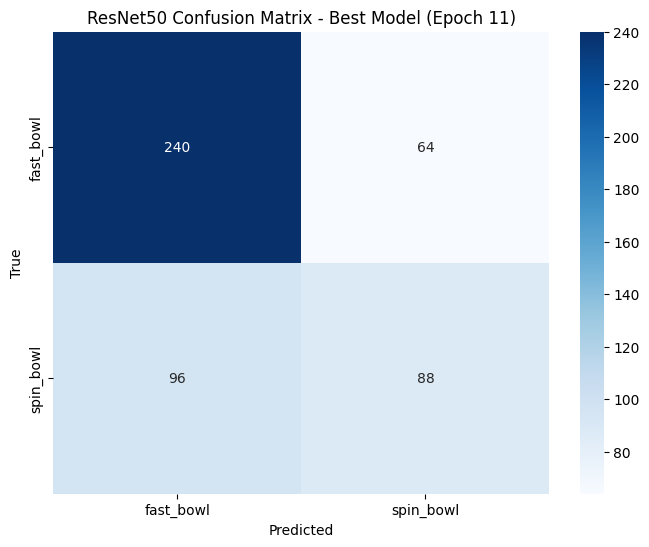

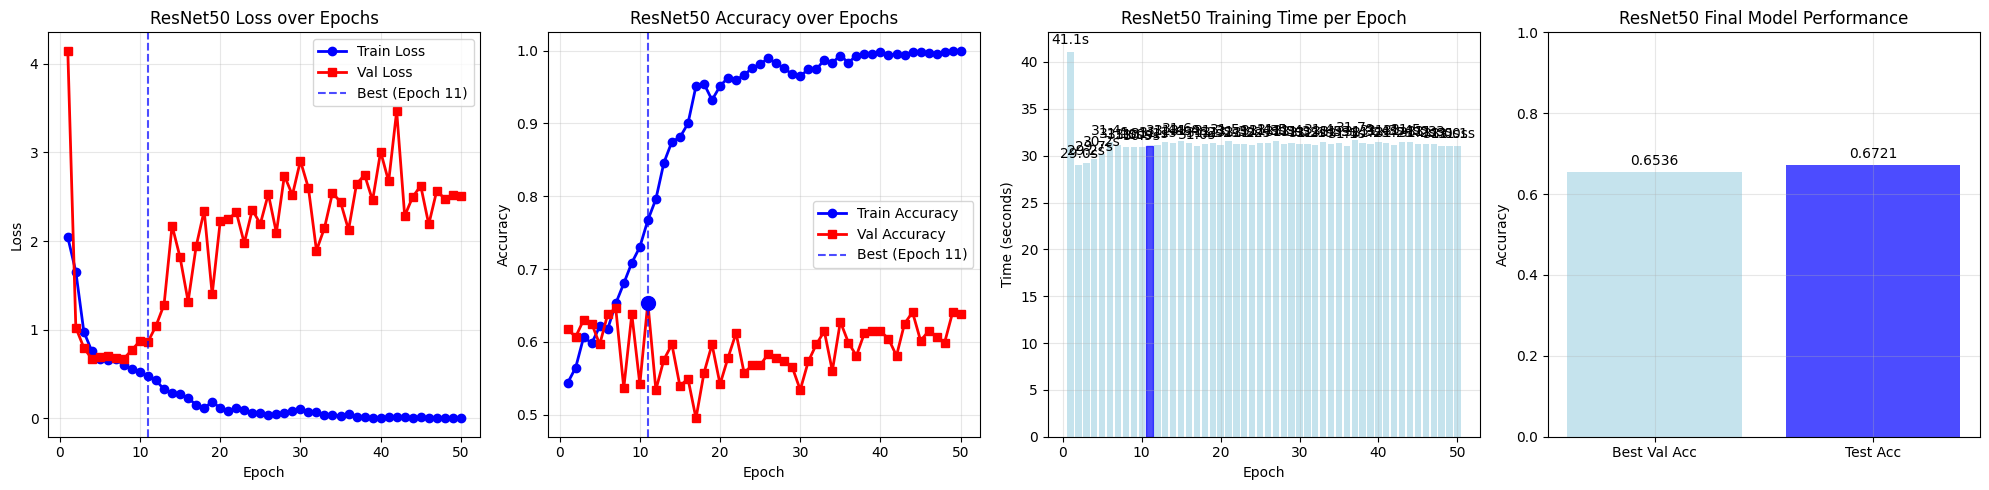


⏰ ResNet50 Final Timing Summary:
│ Total Training: 1565.88s
│ Average per Epoch: 31.32s
│ Testing Time: 7.61s
│ Total Runtime: 1573.49s

💾 ResNet50 Files saved:
│ best_resnet50_model.pth - Best validation accuracy model
│ resnet50_training_history.csv - Training metrics for later plotting

🏗️  ResNet50 Architecture Summary:
│ Total Parameters: 23,512,130
│ Trainable Parameters: 23,512,130
│ Model Size: 89.69 MB
│ Input Size: 224x224x3
│ Output Classes: 2
│ Architecture: ResNet50
│ Block Type: Bottleneck
│ Layers: [3, 4, 6, 3]
│ Skip Connections: Yes
│ Batch Normalization: Yes
│ Activation: ReLU
│ Zero Init Residual: Yes


In [10]:
# -----------------------------
# 4. Training Loop with Best Model Saving (Val Accuracy) - ResNet50
# -----------------------------
train_losses, val_losses = [], []
train_accs, val_accs = [], []
epoch_times = []
epochs = 50

# Initialize best model tracking
best_val_acc = 0.0
best_model_state = None
best_epoch = 0

print(f"\n🚀 Starting ResNet50 Training for {epochs} epochs...")
print("=" * 80)

total_start_time = time.time()

for epoch in range(epochs):
    epoch_start_time = time.time()
    
    print(f"\n📈 Epoch {epoch+1}/{epochs}")
    print("-" * 50)
    
    # Training Phase
    print("🔄 Training Phase...")
    model.train()
    running_loss, correct, total = 0, 0, 0
    
    train_pbar = tqdm(train_loader, desc=f"Training", 
                     bar_format='{l_bar}{bar:30}{r_bar}{bar:-30b}')
    
    train_phase_start = time.time()
    
    for batch_idx, (imgs, labels) in enumerate(train_pbar):
        imgs, labels = imgs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)
        
        current_acc = correct / total
        train_pbar.set_postfix({
            'Loss': f'{running_loss/(batch_idx+1):.4f}',
            'Acc': f'{current_acc:.4f}'
        })
        
        if device.type == 'cuda' and batch_idx % 10 == 0:
            gpu_memory = torch.cuda.memory_allocated() / 1024**3
            train_pbar.set_postfix({
                'Loss': f'{running_loss/(batch_idx+1):.4f}',
                'Acc': f'{current_acc:.4f}',
                'GPU': f'{gpu_memory:.1f}GB'
            })
    
    train_phase_time = time.time() - train_phase_start
    train_loss = running_loss / len(train_loader)
    train_acc = correct / total
    train_losses.append(train_loss)
    train_accs.append(train_acc)
    
    print(f"✅ Training completed in {train_phase_time:.2f}s")
    
    # Validation Phase
    print("🔍 Validation Phase...")
    model.eval()
    running_loss, correct, total = 0, 0, 0
    
    val_phase_start = time.time()
    val_pbar = tqdm(val_loader, desc=f"Validation", 
                   bar_format='{l_bar}{bar:30}{r_bar}{bar:-30b}')
    
    with torch.no_grad():
        for batch_idx, (imgs, labels) in enumerate(val_pbar):
            imgs, labels = imgs.to(device), labels.to(device)
            outputs = model(imgs)
            loss = criterion(outputs, labels)
            
            running_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
            
            current_acc = correct / total
            val_pbar.set_postfix({
                'Loss': f'{running_loss/(batch_idx+1):.4f}',
                'Acc': f'{current_acc:.4f}'
            })
    
    val_phase_time = time.time() - val_phase_start
    val_loss = running_loss / len(val_loader)
    val_acc = correct / total
    val_losses.append(val_loss)
    val_accs.append(val_acc)
    
    print(f"✅ Validation completed in {val_phase_time:.2f}s")
    
    # Check if this is the best model so far based on val_acc
    is_best = val_acc > best_val_acc
    if is_best:
        best_val_acc = val_acc
        best_epoch = epoch + 1
        best_model_state = model.state_dict().copy()
        print(f"🌟 New best ResNet50 model found! Validation Accuracy: {val_acc:.4f}")
    
    # Epoch Summary
    epoch_time = time.time() - epoch_start_time
    epoch_times.append(epoch_time)
    
    print(f"\n📊 Epoch {epoch+1} Summary:")
    print(f"│ Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f}")
    print(f"│ Val Loss:   {val_loss:.4f} | Val Acc:   {val_acc:.4f}")
    print(f"│ Train Time: {train_phase_time:.2f}s | Val Time: {val_phase_time:.2f}s")
    print(f"│ Total Epoch Time: {epoch_time:.2f}s")
    print(f"│ Best Val Acc: {best_val_acc:.4f} (Epoch {best_epoch})")
    
    if device.type == 'cuda':
        print(f"│ GPU Memory: {torch.cuda.memory_allocated()/1024**3:.1f}GB / {torch.cuda.memory_reserved()/1024**3:.1f}GB")
    
    print("=" * 80)

total_training_time = time.time() - total_start_time

# Save the best model
if best_model_state is not None:
    torch.save(best_model_state, 'best_resnet50_model.pth')
    print(f"\n💾 Best ResNet50 model saved as 'best_resnet50_model.pth'")
    print(f"📊 Best model stats:")
    print(f"│ Best Epoch: {best_epoch}")
    print(f"│ Best Val Acc: {best_val_acc:.4f}")

# Save training history data to CSV
history_data = {
    'epoch': list(range(1, epochs+1)),
    'train_loss': train_losses,
    'val_loss': val_losses,
    'train_acc': train_accs,
    'val_acc': val_accs,
    'epoch_time': epoch_times
}
history_df = pd.DataFrame(history_data)
history_df.to_csv('resnet50_training_history.csv', index=False)
print("\n💾 ResNet50 training history saved to 'resnet50_training_history.csv'")

# Training Summary
print(f"\n🎉 ResNet50 Training Complete!")
print(f"Total Training Time: {total_training_time:.2f}s ({total_training_time/60:.1f} minutes)")
print(f"Average Epoch Time: {np.mean(epoch_times):.2f}s")
print("\n⏱️  Epoch Timing Breakdown:")
for i, t in enumerate(epoch_times):
    print(f"│ Epoch {i+1}: {t:.2f}s")

# -----------------------------
# 5. Load Best Model and Test
# -----------------------------
print(f"\n🧪 Loading Best ResNet50 Model for Testing...")

# Load the best model state
if best_model_state is not None:
    model.load_state_dict(best_model_state)
    print(f"✅ Best ResNet50 model from epoch {best_epoch} loaded successfully!")
else:
    print("⚠️  No best model found, using current model state")

test_start_time = time.time()
y_true, y_pred = [], []
model.eval()

test_pbar = tqdm(test_loader, desc="Testing ResNet50", 
                bar_format='{l_bar}{bar:30}{r_bar}{bar:-30b}')

with torch.no_grad():
    for imgs, labels in test_pbar:
        imgs, labels = imgs.to(device), labels.to(device)
        outputs = model(imgs)
        _, preds = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

test_time = time.time() - test_start_time
test_accuracy = accuracy_score(y_true, y_pred)

print(f"✅ ResNet50 Testing completed in {test_time:.2f}s")
print("\n📋 ResNet50 Classification Report:")
print(classification_report(y_true, y_pred, target_names=classes,digits=4))
print(f"🎯 ResNet50 Test Accuracy: {test_accuracy:.4f}")

# Model Performance Summary
print(f"\n📊 ResNet50 Model Performance Summary:")
print(f"│ Best Validation Acc:  {best_val_acc:.4f} (Epoch {best_epoch})")
print(f"│ Final Test Accuracy:  {test_accuracy:.4f}")
print(f"│ Val-Test Gap:         {abs(best_val_acc - test_accuracy):.4f}")

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title(f"ResNet50 Confusion Matrix - Best Model (Epoch {best_epoch})")
plt.show()

# -----------------------------
# 6. Enhanced Visualizations
# -----------------------------
plt.figure(figsize=(20, 5))

# Loss Plot
plt.subplot(1, 4, 1)
plt.plot(range(1, epochs+1), train_losses, 'b-', label="Train Loss", marker='o', linewidth=2)
plt.plot(range(1, epochs+1), val_losses, 'r-', label="Val Loss", marker='s', linewidth=2)
plt.axvline(x=best_epoch, color='blue', linestyle='--', alpha=0.7, label=f'Best (Epoch {best_epoch})')
plt.legend()
plt.title("ResNet50 Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True, alpha=0.3)

# Accuracy Plot
plt.subplot(1, 4, 2)
plt.plot(range(1, epochs+1), train_accs, 'b-', label="Train Accuracy", marker='o', linewidth=2)
plt.plot(range(1, epochs+1), val_accs, 'r-', label="Val Accuracy", marker='s', linewidth=2)
plt.axvline(x=best_epoch, color='blue', linestyle='--', alpha=0.7, label=f'Best (Epoch {best_epoch})')
plt.scatter([best_epoch], [best_val_acc], color='blue', s=100, zorder=5)
plt.legend()
plt.title("ResNet50 Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True, alpha=0.3)

# Timing Plot
plt.subplot(1, 4, 3)
bars = plt.bar(range(1, epochs+1), epoch_times, color='lightblue', alpha=0.7)
bars[best_epoch-1].set_color('blue')
plt.title("ResNet50 Training Time per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Time (seconds)")
plt.grid(True, alpha=0.3)
for i, t in enumerate(epoch_times):
    plt.text(i+1, t+0.5, f'{t:.1f}s', ha='center', va='bottom')

# Performance Comparison
plt.subplot(1, 4, 4)
metrics = ['Best Val Acc', 'Test Acc']
values = [best_val_acc, test_accuracy]
colors = ['lightblue', 'blue']
bars = plt.bar(metrics, values, color=colors, alpha=0.7)
plt.title("ResNet50 Final Model Performance")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.grid(True, alpha=0.3)
for bar, val in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2, val + 0.01, 
             f'{val:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print(f"\n⏰ ResNet50 Final Timing Summary:")
print(f"│ Total Training: {total_training_time:.2f}s")
print(f"│ Average per Epoch: {np.mean(epoch_times):.2f}s")
print(f"│ Testing Time: {test_time:.2f}s")
print(f"│ Total Runtime: {total_training_time + test_time:.2f}s")

print(f"\n💾 ResNet50 Files saved:")
print(f"│ best_resnet50_model.pth - Best validation accuracy model")
print(f"│ resnet50_training_history.csv - Training metrics for later plotting")

# -----------------------------
# 7. ResNet50 Architecture Summary
# -----------------------------
print(f"\n🏗️  ResNet50 Architecture Summary:")
print(f"│ Total Parameters: {sum(p.numel() for p in model.parameters()):,}")
print(f"│ Trainable Parameters: {sum(p.numel() for p in model.parameters() if p.requires_grad):,}")
print(f"│ Model Size: {sum(p.numel() * p.element_size() for p in model.parameters()) / 1024**2:.2f} MB")
print(f"│ Input Size: 224x224x3")
print(f"│ Output Classes: {len(classes)}")
print(f"│ Architecture: ResNet50")
print(f"│ Block Type: Bottleneck")
print(f"│ Layers: [3, 4, 6, 3]")
print(f"│ Skip Connections: Yes")
print(f"│ Batch Normalization: Yes")
print(f"│ Activation: ReLU")
print(f"│ Zero Init Residual: Yes")


In [11]:
import pandas as pd
df=pd.read_csv("/kaggle/working/resnet50_training_history.csv")
df

,epoch,train_loss,val_loss,train_acc,val_acc,epoch_time
0,1,2.041995,4.144869,0.543421,0.617188,41.108999
1,2,1.654023,1.024056,0.564474,0.606771,28.978204
2,3,0.977076,0.797002,0.606579,0.630208,29.209622
3,4,0.757746,0.669167,0.598026,0.625000,29.664563
4,5,0.671136,0.695054,0.621053,0.596354,30.201959
5,6,0.664005,0.702473,0.617763,0.638021,31.430214
6,7,0.666602,0.677587,0.652632,0.645833,31.107170
7,8,0.602353,0.675036,0.680263,0.536458,30.963275
8,9,0.555009,0.772855,0.708553,0.638021,30.962244
9,10,0.524203,0.873979,0.730263,0.541667,30.879769
